### IFPB - Engenharia de Computação <br> <br>Sinais e Sistemas

Gabriel Lopes Rodrigues e Silva

#### Parte I: Implementação de algoritmo de cálculo da convolução entre dois sinais

Nessa primeira parte estamos interessados em verificar o cálculo da convolução com base na implementação de um algoritmo inspirado pela abordagem gráfica.

A convolução descreve uma operação matemática que combina dois sinais para criar um terceiro sinal, representando como um sinal modifica o outro ao passarem por um sistema. Isso é essencial em várias áreas, como processamento de imagens, processamento de áudio, telecomunicações e muitos campos da engenharia.

No contexto do processamento de sinais, implementar um algoritmo para calcular a convolução entre dois sinais envolve a aplicação de operações matemáticas, como somas e multiplicações, em cada ponto dos sinais de entrada. Isso pode ser feito de várias maneiras, como através do método direto, utilizando a propriedade de convolução no domínio da frequência (usando transformadas de Fourier) ou com técnicas mais eficientes, como a convolução rápida (FFT - Fast Fourier Transform), dependendo dos requisitos de desempenho e precisão do sistema. Dessa forma vão ser abordados os metodos e analisados os resultados da manipulação dos sinais mostrados.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

- Primeiro Exemplo mostrado no material a convolução do sinais :<br><br>
    
    x[n] = 

\begin{cases} 
    1, & \text{se } n = -1 \\
    2, & \text{se } n = 0 \\
    1, & \text{se } n = 1 \\
    0, & \text{caso contrário (c.c.)}
\end{cases}

    h[n] = 

\begin{cases} 
    2, & \text{se } n = 0 \\
    3, & \text{se } n = 1 \\
    -2, & \text{se } n = 2 \\
    0, & \text{caso contrário (c.c.)}
\end{cases}


In [2]:
a = np.array([2, 3, -2])
b = np.array([1, 2, 1])

In [3]:
def convolucao(x,h):
    y = np.zeros(len(x)+len(h)-1)
    for i in range(len(x)):
        r = x[i] * h
        for j in range(len(h)):
            y[i+j] = y[i+j] + r[j]
    return y

In [4]:
r = convolucao(a,b)
r

array([ 2.,  7.,  6., -1., -2.])

In [5]:
signal.fftconvolve(a, b, mode = 'full')

array([ 2.,  7.,  6., -1., -2.])

In [6]:
def plotar_sd(vetor1, vetor2, vetor3):
    fig, axs = plt.subplots(3, 1, figsize=(8, 12))
    for i, vetor in enumerate([vetor1, vetor2, vetor3]):
        indices = np.arange(len(vetor))
        axs[i].scatter(indices, vetor, label=f'Vetor {i+1}')
        for j, val in enumerate(vetor):
            axs[i].plot([indices[j], indices[j]], [val, 0], color='gray', linestyle='--', linewidth=1)
        axs[i].axhline(y=0, color='black', linewidth=1)
        axs[i].set_xlabel('Índices')
        axs[i].set_ylabel('Valores')
        axs[i].set_title(f'Sinais Discretos - Vetor {i+1}')
        axs[i].legend()
    plt.tight_layout()
    plt.show()

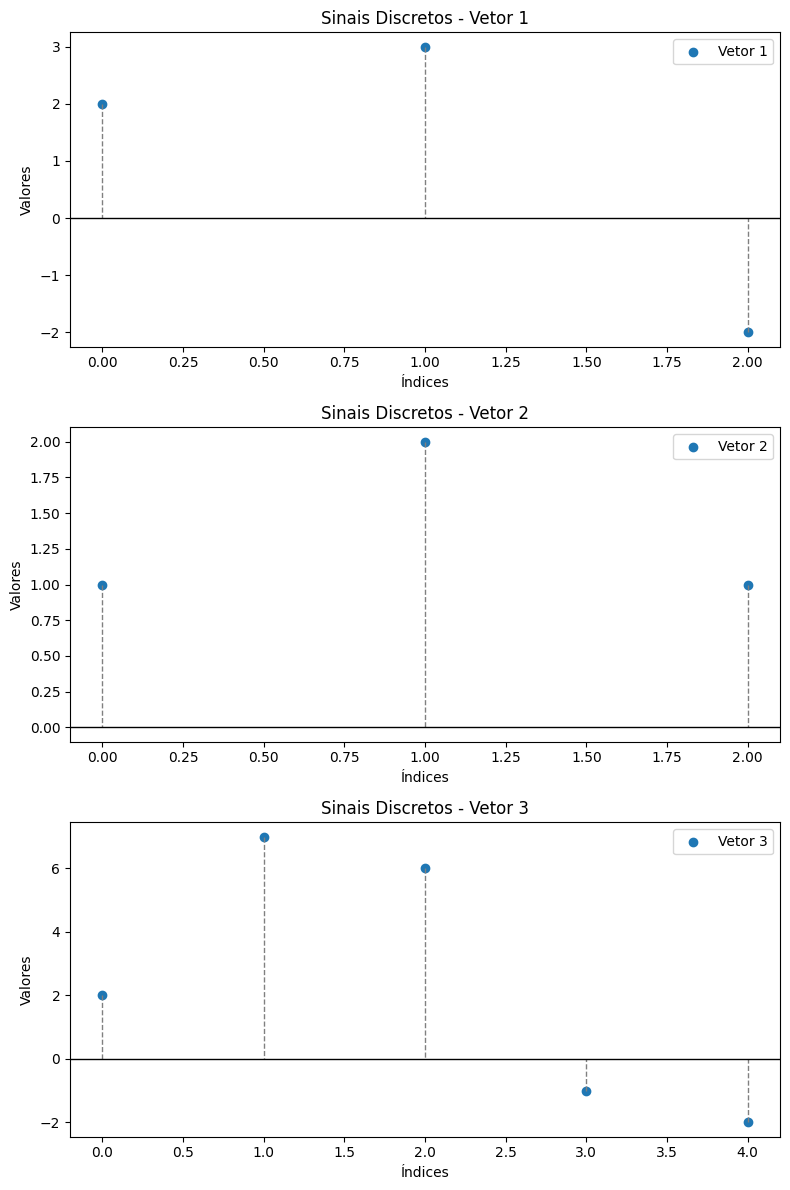

In [7]:
plotar_sd(a,b,r)

Tanto a função do scipy , quanto o metodo criado retornam mesma resposta de vetor da convolução dos dois sinais

A expressão \( y[n] = x[n] * h[n] \) pode ser representada por:

y[n] = \begin{cases} 
2, & \text{se } n = -1 \\
7, & \text{se } n = 0 \\
6, & \text{se } n = 1 \\
-1, & \text{se } n = 2 \\
-2, & \text{se } n = 3 \\
0, & \text{caso contrário (c.c.)}
\end{cases}


- No segundo exemplo temos : 

A função \( h[n] \) pode ser representada por:

h[n] = \begin{cases} 
2, & \text{se } n = -1 \text{ ou } n = 1 \\
0, & \text{caso contrário (c.c.)}
\end{cases}


x[n] = \begin{cases} 
1, & \text{se } n = 0 \\
2, & \text{se } n = 1 \\
-1, & \text{se } n = 3 \\
0, & \text{caso contrário (c.c.)}
\end{cases}

In [8]:
h = np.array([2,0,2])
x = np.array([1,2,0,-1])

In [9]:
r = convolucao(h,x)
r

array([ 2.,  4.,  2.,  2.,  0., -2.])

In [10]:
signal.fftconvolve(h,x, mode = 'full')

array([ 2.00000000e+00,  4.00000000e+00,  2.00000000e+00,  2.00000000e+00,
        1.48029737e-16, -2.00000000e+00])

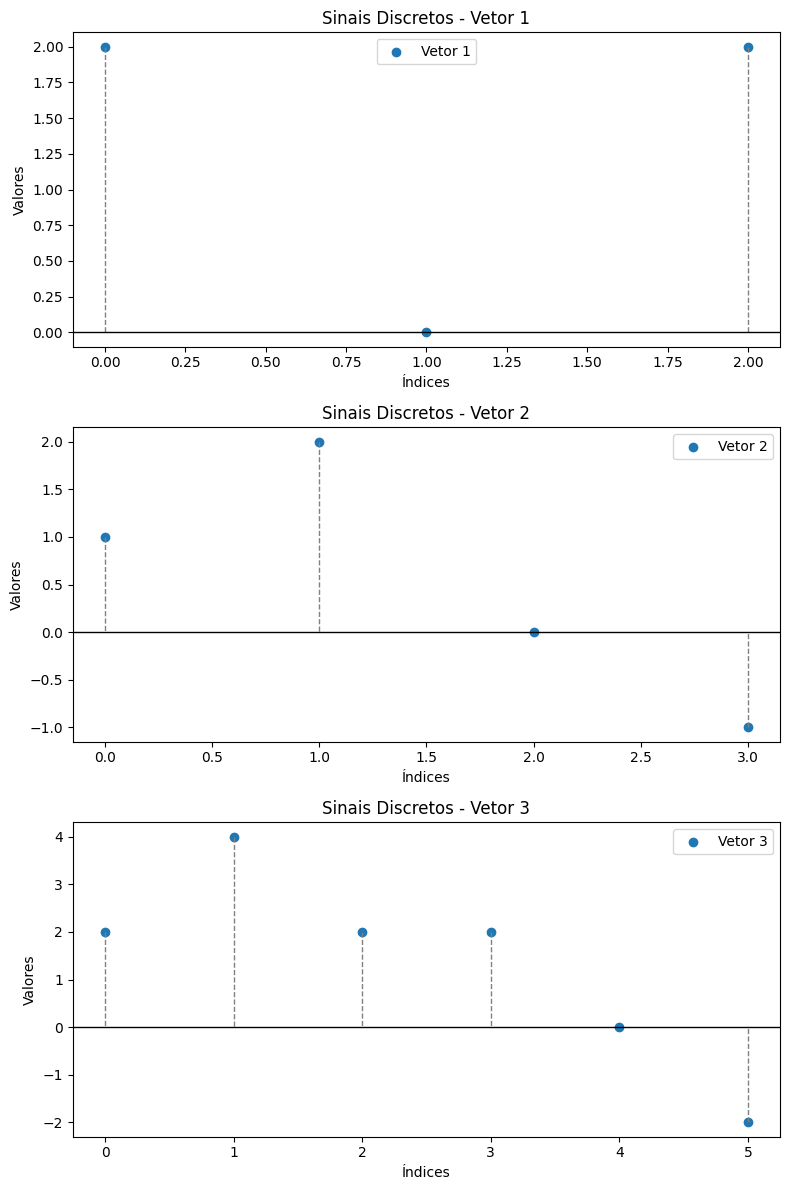

In [11]:
plotar_sd(h,x,r)

In [12]:
def plotar(vetor1, vetor2, vetor3):
    fig, axs = plt.subplots(3, 1, figsize=(8, 12))
    for i, vetor in enumerate([vetor1, vetor2, vetor3]):
        indices = np.arange(len(vetor))
        axs[i].plot(indices, vetor, linestyle='-')
        axs[i].set_xlabel('Índices')
        axs[i].set_ylabel('Valores')
        axs[i].set_title(f'Gráfico do Vetor {i+1}')
        axs[i].grid(True)
    plt.tight_layout()
    plt.show()

- Agora o terceiro exemplo com sinais mais robustos:

x(t) = seno(t) 

h[n] = \begin{cases} 
1, & \text{se } -1 \leq t \leq 0 \\
2, & \text{se } 0 \leq t \leq 1 \\
1, & \text{se } 1 \leq t \leq 2 \\
0, & \text{caso contrário (c.c.)}
\end{cases}



In [13]:
t = np.linspace(-5,5,250)
x = np.sin(t)
x0 = np.where((t >= -1) & (t <= 0), 1, 0)
x1 = np.where((t >= 0) & (t <= 1), 2, 0)
x2 = np.where((t >= 1) & (t <= 2), 1, 0)
h = x0+x1+x2

In [14]:
r = convolucao(h,x)

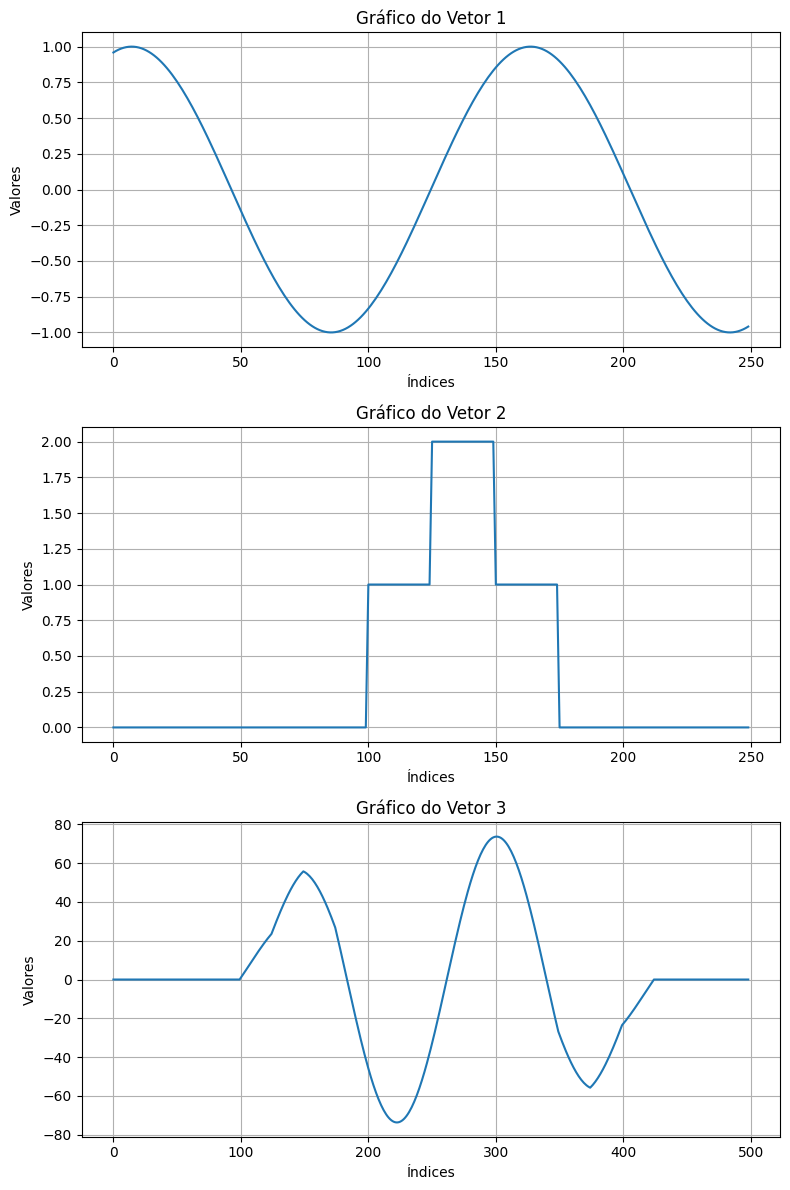

In [15]:
plotar(x,h,r)

- Agora usando tambem o sistema do notebook de classificação de sistemas

y[n] = \begin{cases} 
x[n] \times 2, & \text{se } 0 \leq x[n] \leq 1 \\
(2 - x[n]) \times 2, & \text{se } 1 < x[n] \leq 2 \\
0, & \text{caso contrário (c.c.)}
\end{cases}

In [16]:
def sistema(x):
    y = np.zeros_like(x)
    for i, val in enumerate(x):
        if val >= 0 and val <= 2:
            if val <= 1:
                y[i] = val * 2
            else:
                y[i] = (2 - val)*2
    return y
y = np.array(sistema(t))

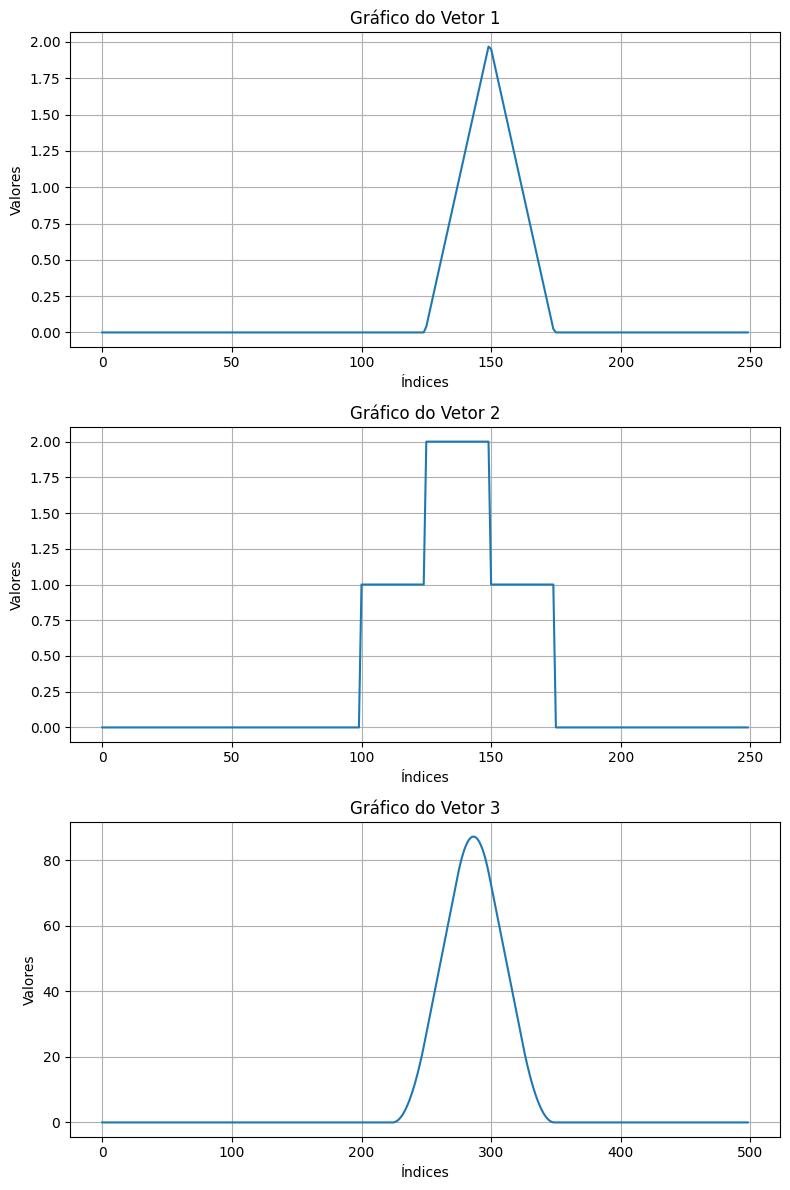

In [17]:
r = convolucao(y,h)
plotar(y,h,r)

#### Parte II: Resposta ao impulso de uma sala na presença de eco

Nessa segunda parte iremos estudar a resposta ao impulso de um sistema real, que gera eco em uma
sala cuja resposta ao impulso é conhecida. Para isso, consideraremos o notebook disponível no link 2, que
traz um exercício prático para a convolução entre um sinal de áudio e a resposta ao impulso de uma sala.

Adaptado do Notebook = https://raw.githubusercontent.com/spatialaudio/signals-and-systems-lecture/master/discrete_systems_time_domain/impulse_response.ipynb

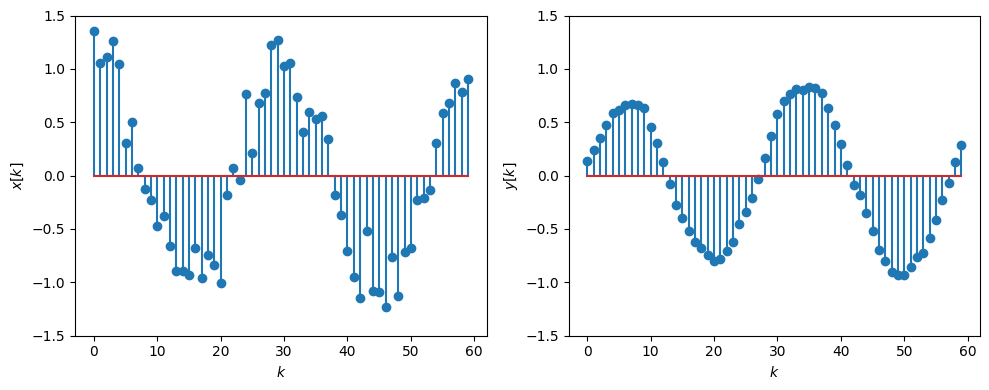

In [18]:
%matplotlib inline

def rect(k, N):
    return np.where((k >= 0) & (k < N), 1.0, 0.0)

np.random.seed(seed=0)
N = 10
k = np.arange(0, 60)
h = 1/N * rect(k, N)
x = np.cos(2*np.pi/30 * k) + .2 * np.random.normal(size=(len(k)))
y = convolucao(x, h)

plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.stem(k, x)
plt.xlabel('$k$')
plt.ylabel(r'$x[k]$')
plt.ylim([-1.5, 1.5])

plt.subplot(122)
plt.stem(k, y[0:len(x)])
plt.xlabel('$k$')
plt.ylabel('$y[k]$')
plt.ylim([-1.5, 1.5])
plt.tight_layout()

(0.0, 40.0, -0.7, 2.6)

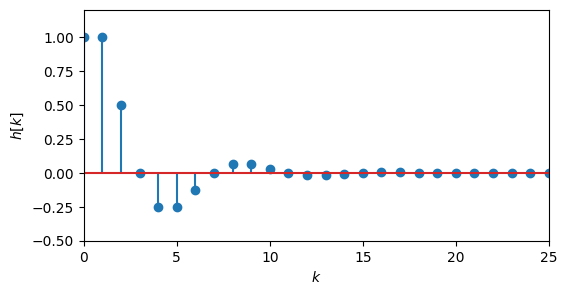

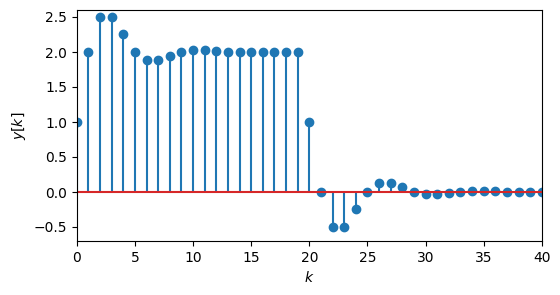

In [19]:
def dirac(k):
    return np.where(k == 0, 1.0, 0.0)

a = [1.0, -1.0, 1/2]
b = [1.0]
k = np.arange(256)
x = dirac(k)
h = signal.lfilter(b, a, x)

plt.figure(figsize=(6, 3))
plt.stem(k, h)
plt.xlabel('$k$')
plt.ylabel(r'$h[k]$')
plt.axis([0, 25, -.5, 1.2])

x = rect(k, 20)
y_ir = convolucao(h, x)

plt.figure(figsize=(6, 3))
plt.stem(k, y_ir[:len(k)])
plt.xlabel('$k$')
plt.ylabel(r'$y[k]$')
plt.axis([0, 40, -.7, 2.6])

Nosso interesse agora é verificar o efeito de eco na resposta do sistema , Para isso iremos sintetizar um efeito de eco no sinal de entrada, também usando convolução (e a função implementada na 1ª Tarefa)

In [20]:
import wave
from IPython.display import Audio
audio = wave.open('/home/VeronicaLopes/Downloads/voice.wav')

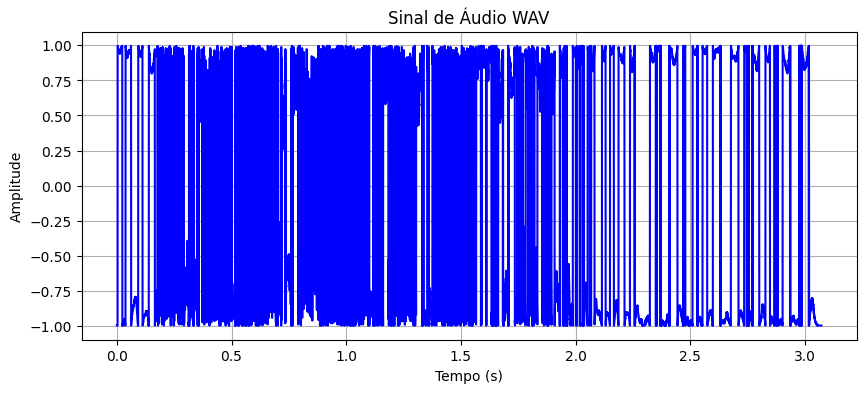

In [21]:
taxa_amostragem = audio.getframerate()
num_frames = audio.getnframes()
duração = num_frames / taxa_amostragem
quadros = audio.readframes(num_frames)
amplitudes = np.frombuffer(quadros, dtype=np.int16)
amplitudes = amplitudes / (2**15)

tempo = np.linspace(0, duração, len(amplitudes))
plt.figure(figsize=(10, 4))
plt.plot(tempo, amplitudes, color='b')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.title('Sinal de Áudio WAV')
plt.grid(True)
plt.show()

In [22]:
from scipy.io import wavfile
from IPython.display import Audio

def add_echo(audio, delay, alpha):
    echo = np.zeros(len(audio))
    delay = int(delay * Fs)
    echo[:delay] = audio[:delay]
    for i in range(delay, len(audio)):
        echo[i] = audio[i] + alpha * audio[i - delay]
    return echo

In [23]:
Fs, audio = wavfile.read('/home/VeronicaLopes/Downloads/voice.wav')
delay = 1
alpha = 5
audio_with_echo = add_echo(audio, delay, alpha)

Reproduzindo Áudio Original

In [24]:
Audio(data=audio, rate=Fs)

Reproduzindo Áudio com Eco

In [25]:
Audio(data=audio_with_echo, rate=Fs)

Uma vez que consigamos efetuar esse efeito de eco sobre um sinal, podemos agora verificar como o eco
pode atuar sobre um sinal propagando na sala estudada, para isso, vamos testar o efeito da
convolução do sinal de entrada com eco e verificar os resultados

In [26]:
N = len(audio_with_echo)
k = np.arange(0, N)
np.random.seed(seed=0)
N = 10
k = np.arange(0, 60)
h = 1/N * rect(k, N)
x = np.cos(2*np.pi/30 * k) + .2 * np.random.normal(size=(len(k)))
h = audio_with_echo
y = convolucao(x, h)

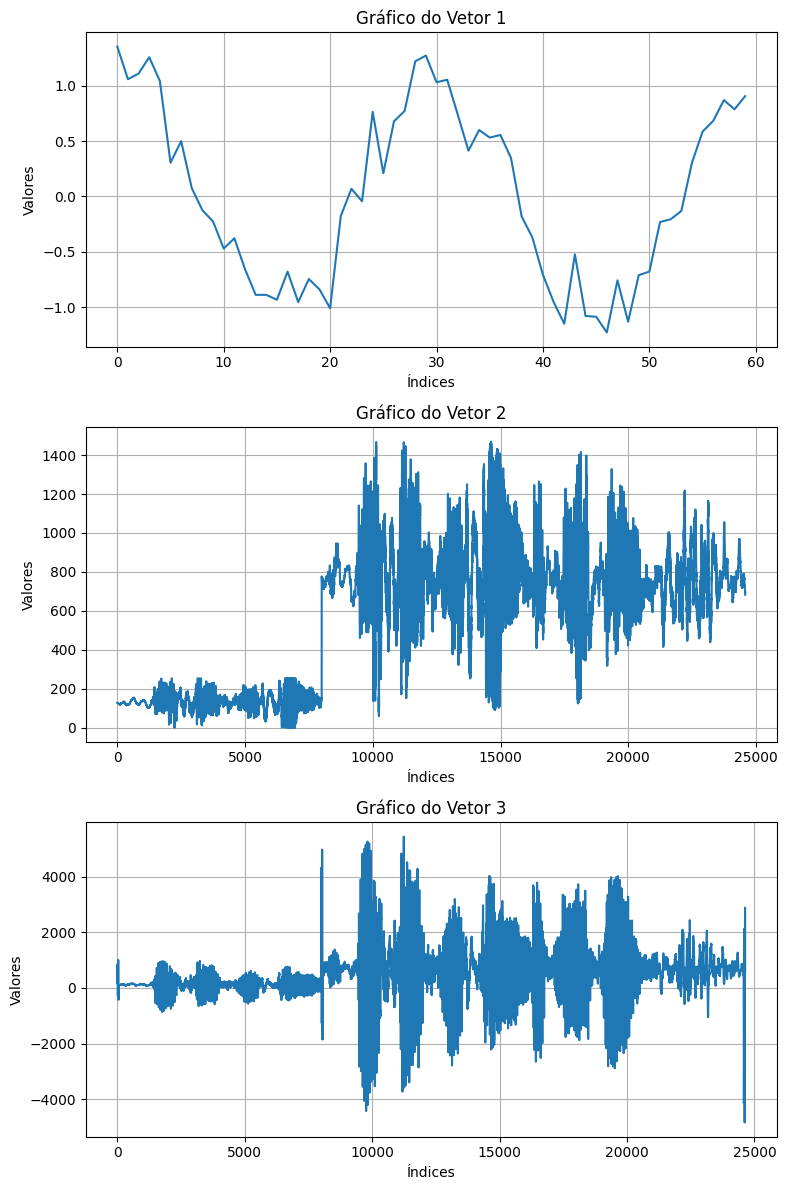

In [27]:
plotar(x,h,y)

Observando com ficou o audio com eco após a convolução

In [28]:
y_normalized = y / np.max(np.abs(y))
Audio(data=y, rate=Fs)